## 用数学和机器学习解析足球比赛预测与投注

### 摘要

1. 要想对足球比赛胜平负结果进行投注实现盈利，模型预测准确率应大于对应赔率倒数的平均值。预测准确率本身不能决定收益率。
2. 使用所有博彩公司的最大赔率为预测模型进行收益评估可以为比较不同预测模型的收益率建立统一的比较基线。
3. 在特定条件下，使用本文建立的预测模型进行投注收益率大于0。
4. 为进一步提高收益率使得收益率95%置信区间的下限大于0，应使用不太常见但又影响比赛结果的信息对比赛进行预测，避免使用场均进球数等常见数据。

### 目录

1. [引言](#introduction)
2. [方法](#method)
3. [讨论](#discussion)
4. [结论](#conclusion)
5. [参考资料](#reference)
6. [附录：数据分析笔记/代码](#backup)

#### <a id='introduction'></a>1 引言

如何对足球比赛结果进行投注实现盈利？学术文献中的方法有：

* <cite data-cite="7868006/JMVPH926"></cite> 使用泊松分布模型估计比赛胜平负的概率，并对$p\hat b>1.1$的比赛进行投注可使收益率为正，其中$p$为模型对比赛结果的概率估计，$\hat b$为对应赔率进行归一化调整后的值。但收益率的区间估计表明收益率无法保证一定为正。
* <cite data-cite="7868006/MJRU4HWP"></cite> 同样使用泊松分布模型，并采取收益期望最大化同时保证收益方差低于一定限度的策略进行投注，则英超联赛的收益率为39.6%（-47.2%，87.8%），英格兰第一级别联赛的收益率为54%（-29.5%，58%），其中括号内为$\pm$两倍后验标准差。这一结果表明收益率无法保证一定为正。
* <cite data-cite="7868006/FBRY59BC"></cite> 使用有序probit回归模型作为预测模型，回归模型中的特征变量有：过往比赛结果、比赛对联赛排名影响的重要性、对阵双方是否参加杯赛以及客队离主队主场的地理距离。使用该模型的预测并对收益期望最大的结果进行投注，则1999和2000赛季4、5月份比赛的收益率为+8%，而所有比赛的收益率为负。该研究没有给出收益率的区间估计。
* <cite data-cite="7868006/5RP7EH3X"></cite> 使用贝叶斯网络作为预测模型，利用历史数据得到球队实力的先验估计，再根据球队赛前的心理状态和疲劳程度更新球队的实力估计。在此基础上，采取的投注策略为仅投注$p-\frac{1}{b}\geq 0.05$的比赛结果。当$b$为各大博彩公司开出的最大赔率时，收益率为8.4%；当$b$为平均赔率时，收益率为2.87%；当$b$为威廉希尔（William Hill）赔率时，收益率为9.48%。该论文没有给出收益率的区间估计。

以上文献试图说明所使用的预测方法可以实现盈利，然而实际是否如此有待检验。一个更关键的问题是，上述文献没有从理论上讲明白需要达到怎样的预测程度才能实现盈利。本文将给出实现盈利的预测条件。另一个反过来的问题是，如何通过盈利评估确定哪一个预测模型更好。直接对各种预测模型的收益率进行比较是不可取的。这是因为只有在给定投注赔率和投注策略的前提下，不同预测模型的收益率才可以进行比较。到目前为止，学术文献中还欠缺一个从收益率的角度对各种预测模型进行比较的方法，而本文将提出一个可行的方法。

#### <a id='method'></a>2 方法

2.1 实现盈利的条件

假设某场比赛某种结果出现概率为p，对应赔率为b，则对这一结果进行投注的收益期望为：

$$E(r) = p(b-1) +(1-p)(-1) = pb-1$$

例如，$p=0.5$， $b=3$，则$E(r)=0.5$，即本金为1，收益期望为0.5，最终本金变为1.5。收益期望$pb-1$又叫做利润率（edge）。

由收益期望的定义可知，对某一种比赛结果进行投注的收益与概率和赔率有关，而同一场比赛不同比赛结果有不同的概率和赔率，因此对某一场比赛进行投注的收益还与投注策略有关：即选择哪一个比赛结果。因此，对比赛结果进行投注的收益与三个要素有关：概率、赔率和投注策略。当给定概率和投注策略时，赔率越大，收益期望越大。因此，在条件允许的情况下，应选择各家博彩公司的最高赔率。而当给定概率和赔率时，投注策略为投注收益期望最高且大于0的比赛结果，而不是投注概率最大的比赛结果。

可以看到，给定概率后，选择赔率和确定投注策略存在确定的方案。因此，确定比赛结果的概率是确保盈利最重要的前提。无论如何确定概率，对概率的准确性进行评估总是必要的，因为概率的误差会导致收益期望也存在误差。通用的评估方法为使用测试数据。

假设测试数据有n场比赛，使用某种投注策略对这n场比赛进行预测的收益期望为$\sum_i (p_i b_i-1)$。收益期望大于0的充分条件为每一场比赛的收益期望都大于0，即对任意i，都有$p_i >\frac{1}{b_i}$。由这一条件可得推论：

$$\frac{1}{n}\sum_{i=1}^n p_i > \frac{1}{n}\sum_{i=1}^n \frac{1}{b_i}$$

又这n场比赛的预测准确率$a=\frac{1}{n}\sum_i{T_i}$，其中$T_i\in \{0,1\}$，0意味着第i场比赛预测错误，1意味着第i场比赛预测正确。每场比赛预测正确的概率为$p_i$，则$E(a)=\frac{1}{n}\sum_i E(T_i)=\frac{1}{n}\sum_i p_i$ ，所以上述推论又可表述为：

$$E(a) > \frac{1}{n}\sum_{i=1}^n \frac{1}{b_i}=\overline {\frac{1}{b}}$$

当n较大时，E(a)可用a来估计，因此：

$$a>\overline {\frac{1}{b}}$$

记做在某种投注策略下的模型预测准确率大于对应赔率倒数的平均值。注意这一实现盈利的条件在数学上既非充分也非必要，但从实践看来，这一条件可以很好地将模型预测准确率与盈利联系起来，为模型的改进确定方向。

若要确保盈利，则条件可改为：模型预测准确率95%置信区间的下限大于预测结果对应赔率倒数的平均值。预测准确率的置信区间可由自助法（bootstrap）得到。

2.2 预测模型的比较

前面的讨论还剩下一个问题，那就是如何通过预测模型的盈利评估对不同模型进行比较和选择，从而确定更好的预测模型。直接对各种预测模型的收益率进行比较是不可取的。这是因为只有在给定投注赔率和投注策略的前提下，不同预测模型的收益率才可以进行比较。投注策略还比较容易统一，而使用相同的赔率数据却并不简单。不同研究预测的比赛及其对应的赔率不尽相同，即使同样的比赛也可能会使用不同博彩公司的赔率。因此到目前为止，学术文献中还欠缺一个从收益率的角度对各种预测模型进行比较的方法。本文将提出一个可行的方法，这涉及到对赔率的性质更多的认识。所以接下来先谈一下赔率的性质，再提出通过盈利评估比较预测模型的方法。

首先简单介绍一下赔率。2007年12月8日，阿森纳在英超联赛中主场迎战富勒姆。博彩公司BET365开出的赔率组合是：阿森纳获胜，赔率1.33；两队打平，赔率4.5；客队富勒姆获胜，赔率10。这些数字意味着：假设比赛前押1元猜主队阿森纳获胜，而最终比赛结果确实是主队获胜，那么就能赢回1.33元。扣除押的1元，那么盈利就是0.33元。如果比赛结果是双方打平，或者客队胜，那么就输掉了押的1元钱。剩下两个赔率类似，代表押对结果博彩公司会返回的钱。扣除本金1元，获得的盈利分别为3.5元和9元。

博彩公司制定赔率的要点在于：无论出现什么样的比赛结果，博彩公司都能赚钱。由此得出赔率的第一条性质：

* 性质1：$f<\frac{1}{b}$，其中$f$为某种比赛结果的（资金）投注比例，$b$为对应的赔率。

下面证明这一性质。以上面提到的阿森纳对阵富勒姆的比赛为例。假设在全体彩民中，押阿森纳获胜的投注比例是$f_{0}$，对应博彩公司开出的赔率是$b_{0}$；押两队打平的比例是$f_{1}$，对应博彩公司开出的赔率为$b_{1}$；押富勒姆获胜的比例是$f_{2}$，对应博彩公司开出的赔率为$b_{2}$。容易知道，所有结果的投注比例之和为1：

$$f_{0}+f_{1}+f_{2}=1$$

如果最终比赛结果是阿森纳赢，那么博彩公司的收益为（假设总的投注额为1）：

$$-f_{0}(b_{0}-1)+f_{1}+f_{2}=1-f_{0}b_{0}$$

博彩公司只要能够保证这一收益大于$0$即可：$f_{0}<\frac{1}{b_{0}}$。同样地，若比赛结果是双方打平或者富勒姆获胜时，博彩公司需保证下面两个不等式成立才能赚钱：$f_{1}<\frac{1}{b_{1}}, f_{2}<\frac{1}{b_{2}}$。因此，为了保证出现任何比赛结果都能赚钱，博彩公司一定会设置适当的赔率满足上述不等式。

* 性质1推论：$\sum_i \frac{1}{b_i}>1$，其中$b_i$为某博彩公司为事件i开出的赔率，且各事件之间两两互斥。对于足球比赛胜平负预测来说，$\frac{1}{b_{0}}+\frac{1}{b_{1}}+\frac{1}{b_{2}}>1$。

这一推论的证明从略，其正确性可由实际赔率数据进行检验。

* 性质2：当有多个博彩公司对同一场比赛开出赔率时，取各家赔率中的最大值，则$\frac{1}{b_{0_{max}}}+\frac{1}{b_{1_{max}}}+\frac{1}{b_{2_{max}}}\approx 1$，即$\frac{1}{b_{max}}\approx f$，最大赔率的倒数可以认为是彩民对比赛结果的概率估计。

由赔率的性质2，本文提出通过盈利评估比较预测模型的统一前提：确定某种投注策略，赔率数据则选择所有博彩公司的最大赔率。由赔率的性质2可得，选择最大赔率实质上是将预测模型的概率估计与彩民对比赛结果的概率估计进行比较，这就为比较不同预测模型建立了一个统一的比较基线。预测模型与这条基线的正向偏离越大，收益也就越高。

2.3 预测方法

本文将实际建立预测模型，用前面提到的方法对预测模型进行盈利评估，并确定预测模型所做的预测是否能够实现盈利。

2.3.1 预测模型

本文使用统计建模/机器学习的方法建立预测模型。具体来说，本文将使用XGBoost模型<cite data-cite="7868006/H9V44CSC"></cite>估计比赛胜平负结果的概率。对于结构型数据来说，XGBoost可以算是当前最好的机器学习模型<cite data-cite="7868006/6BHHFMF9"></cite>。这一结论通过以下实践经验可知：Kaggle数据比赛的获胜者或多或少都使用了XGBoost模型。因此，本文将直接使用XGBoost模型作为预测模型，不去比较这一模型与其他统计模型的差异。

2.3.2 数据说明
* 数据来源：[football-data足球数据网站](http://www.football-data.co.uk/)
* 仅使用欧洲五大联赛的数据：英超、德甲、西甲、法甲和意甲
* 2016/2017赛季及其之前的数据作为训练数据，2017/2018、2018/2019两个赛季的数据作为测试数据。每个赛季仅使用9月份之后（不含9月）的数据，因为赛季初的数据还不足以反应球队的水平。

2.3.3 特征变量

由前面的讨论可知，预测模型的概率估计与彩民对比赛结果的概率估计之间的差异将决定收益率。因此一个猜想是：若使用一些普遍能够想到的数据作为特征变量，其与彩民对比赛结果的估计会很接近，造成收益率不高。若使用一些不太常见的数据作为特征变量，所做的估计可能会与彩民的估计有差异。因此，本文将通过三组不同的特征变量建立预测模型：常见特征数据、不常见特征数据、常见特征数据+不常见特征数据。

常见特征数据有：
* 当前赛季平均数据
    * 数据类型包括：进球数、被进球数
    * 数据对象包括：主队、主队本赛季已交手的对手、客队、客队本赛季已交手的对手
* 主客队场均积分
* 主客队联赛相对排名

不常见特征数据
* 当前赛季平均数据
    * 数据类型包括：犯规数、被犯规数、角球数、对手角球数、黄牌数、对手黄牌数、红牌数、对手红牌数、射门数、被射门数、射正数、被射正数
    * 数据对象包括：主队、主队本赛季已交手的对手、客队、客队本赛季已交手的对手

#### <a id='discussion'></a>3 讨论

3.1 主要结果总结

| 特征变量                         |   投注策略  |预测准确率（95%置信区间）|赔率倒数的平均值|收益率（95%置信区间）
| :-------------------------------------------:|:------------:|:---------------------------:|:----------:|:-------------------|
|常见特征数据|选择概率估计最大的结果，投注所有比赛|51.3%（51.3%，52.1%）| 51.9%|-2.83%（-2.88%，-0.81%）|
|常见特征数据|选择收益期望估计最大的结果，投注所有比赛|27.4%（26.6%，29.1%）| 28.2%|-0.24%（-3.10%，-2.02%）|
|不常见特征数据|选择概率估计最大的结果，投注所有比赛|51.8%（51.5%，52.4%）| 51.6%|0.15%（-0.90%，1.75%）|
|不常见特征数据|选择收益期望估计最大的结果，投注所有比赛|28.1%（27.2%，29.6%）| 28.0%|-0.39%（-4.50%，0.94%）|
|所有特征数据|选择概率估计最大的结果，投注所有比赛|52.4%（52.1%，52.7%）| 52.5%|-1.29%（-2.04%，-0.25%）|
|所有特征数据|选择收益期望估计最大的结果，投注所有比赛|28.2%（27.2%，30.0%）| 28.7%|-2.14%（-6.04%，-0.64%）|

上述结果有以下结论：

* 预测准确率本身不能决定收益率，但预测准确率与赔率倒数的平均值之差与收益率正相关。所以本文建立的实现盈利的预测条件$a>\overline {\frac{1}{b}}$是实践可行的。
* 当采取选择概率估计最大的投注策略时，使用常见特征数据的收益率最差。这印证了之前的猜测：使用普遍能够想到的数据作为特征变量，会造成预测模型的估计与彩民的估计接近，造成收益率不高。而使用不常见特征数据的收益率达到了0.15%，是唯一一个正收益率。因此，应该使用不太常见但又影响比赛结果的数据作为特征数据进行预测，才能获得收益。由此出发，本文猜测，使用球队赛前的心理状态和疲劳程度等信息更新球队实力的方法应该是可行的。
* 由同一组特征变量建立的预测模型，采取选择收益期望估计最大的投注策略并没有优于选择概率估计最大的投注策略。这再一次说明了良好的概率估计才是盈利最重要的前提。
* 尽管使用不常见特征数据建立的预测模型+采取选择概率估计最大的投注策略的收益率为0.15%，但收益率95%置信区间的下限为-0.9%，仍然小于0。因此严格意义上讲，这种情况仍未能确保盈利。

3.2 投注策略推广

除了简单地采取选择概率估计最大和选择期望估计最大的投注策略外，还可以通过$p-\frac{1}{b}$的差值对投注比赛进行筛选。不满足$p-\frac{1}{b}>\Delta p$的比赛将不作为投注对象。这样的投注策略理论上可以提高收益率，当然前提仍然是良好的概率估计。在这一维度得到的结果可以得出更多的结论。

3.2.1 常见特征数据+选择概率估计最大的结果
<img src="images/common_features_predict_max_prob_profit.png" />

左侧图为预测准确率与赔率倒数平均值之差，右侧图为收益率。蓝线为实际估计值，绿线为95%置信区间上限，黑线为95%置信区间下限。红线为基准值0。

这张图再次说明了预测准确率与赔率倒数的平均值之差与收益率正相关。其次随着$\Delta p$的增加，收益率并不是提高而是降低。这说明，在这种情况下，通过$p-\frac{1}{b}>\Delta p$对投注比赛进行筛选的策略并不能提高收益率。

3.2.2 常见特征数据+选择收益期望估计最大的结果
<img src="images/common_features_predict_max_edge_profit.png" />

当$\Delta p\approx 0.05$时，收益率为4%。这应该是一个不错的盈利条件，当然按照严格的标准，其95%置信区间下限仍未大于0，无法确保盈利。

3.2.3 不常见特征数据+选择概率估计最大的结果
<img src="images/uncommon_features_predict_max_prob_profit.png" />

最好的盈利条件应该为：当$\Delta p\approx 0$时，收益率为2%。当然同样无法确保盈利。

后面三种情况都没有比较好的盈利条件，就不详细讨论了。

3.2.4 不常见特征数据+选择收益期望估计最大的结果
<img src="images/uncommon_features_predict_max_edge_profit.png" />

3.2.5 所有特征数据+选择概率估计最大的结果
<img src="images/all_features_predict_max_prob_profit.png" />

所有特征数据+选择收益期望估计最大的结果
<img src="images/all_features_predict_max_edge_profit.png" />

#### <a id='conclusion'></a>4 结论

* 实现盈利的预测条件：$a>\overline {\frac{1}{b}}$，模型预测准确率大于对应赔率倒数的平均值。预测准确率本身不能决定收益率，但预测准确率与赔率倒数的平均值之差与收益率正相关。这一预测条件是实践可行的。
* 使用所有博彩公司的最大赔率为预测模型进行收益评估可以为比较不同预测模型的收益率建立统一的比较基线。
* 本文预测模型最好的盈利评估有：
    * 使用不常见特征数据建立预测模型+采取选择概率估计最大的投注策略，收益率为0.15%。
    * 使用常见特征数据建立预测模型+采取选择收益期望估计最大的投注策略，当$\Delta p\approx 0.05$时，收益率为4%。
    * 使用不常见特征数据建立预测模型+采取选择概率估计最大的投注策略，当$\Delta p\approx 0$时，收益率为2%。
    * 上述三种条件都无法确保稳定盈利。
* 为进一步提高收益率使得收益率95%置信区间的下限大于0，应使用不太常见但又影响比赛结果的信息对比赛进行预测，避免使用场均进球数等常见数据。

#### <a id='reference'></a>5 参考资料

<div class="cite2c-biblio"></div>

#### <a id='backup'></a>6 附录：数据分析笔记/代码

In [1]:
%matplotlib inline
import os, glob, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from matplotlib.ticker import PercentFormatter
from matplotlib.dates import DateFormatter

sns.set_style('white')
sns.set_context('poster')
sns.set_style({'font.sans-serif':['simhei','Arial']}) #图中显示中文

In [2]:
def construct_team_stats_df(match, home_team_event_stats_dict, away_team_event_stats_dict,
                            leagueid_col='league_id', season_col='season', date_col='date',
                            hometeamid_col='home_team_api_id', awayteamid_col='away_team_api_id'):
    """
    建立球队比赛数据表，其中每一行的数据为一只球队在一场比赛中的比赛数据记录。
    Construct team's match stats dataframe. Each row is a record for a team in a match.

    Parameters
    ----------
    match:
        Pandas DataFrame
    home_team_event_stats_dict:
        Dictionary, for example: {'goal': 'home_team_goal', 'cross': 'home_team_cross'}
    away_team_event_stats_dict:
        Dictionary, for example: {'goal': 'away_team_goal', 'cross': 'away_team_cross'}
    leagueid_col:
        str, column name of league id in match dataframe
    season_col:
        str, column name of season in match dataframe
    date_col:
        str, column name of date in match dataframe
    hometeamid_col:
        str, column name of home team id in match dataframe
    awayteamid_col:
        str, column name of away team id in match dataframe

    Returns
    -------
    team_event_df, team_event_conceded_df:
        tuple of Pandas DataFrame.
        team_event_df contains team's stats;
        team_event_conceded_df contains team's opponents stats, which is the same as team's conceded stats.
    """

    home_team_event_df = match[[leagueid_col, season_col, date_col, hometeamid_col] + \
                               [item for _, item in home_team_event_stats_dict.items()]].copy()
    away_team_event_df = match[[leagueid_col, season_col, date_col, awayteamid_col] + \
                               [item for _, item in away_team_event_stats_dict.items()]].copy()

    home_team_event_df.rename(columns={hometeamid_col: 'team_id'}, inplace=True)
    home_team_event_df.rename(columns={item: key for key, item in home_team_event_stats_dict.items()}, inplace=True)
    away_team_event_df.rename(columns={awayteamid_col: 'team_id'}, inplace=True)
    away_team_event_df.rename(columns={item: key for key, item in away_team_event_stats_dict.items()}, inplace=True)

    team_event_df = pd.concat([home_team_event_df, away_team_event_df])

    home_team_event_conceded_df = match[[leagueid_col, season_col, date_col, hometeamid_col] + \
                                        [item for _, item in away_team_event_stats_dict.items()]].copy()
    away_team_event_conceded_df = match[[leagueid_col, season_col, date_col, awayteamid_col] + \
                                        [item for _, item in home_team_event_stats_dict.items()]].copy()

    home_team_event_conceded_df.rename(columns={hometeamid_col: 'team_id'}, inplace=True)
    home_team_event_conceded_df.rename(columns={item: key for key, item in away_team_event_stats_dict.items()}, inplace=True)
    away_team_event_conceded_df.rename(columns={awayteamid_col: 'team_id'}, inplace=True)
    away_team_event_conceded_df.rename(columns={item: key for key, item in home_team_event_stats_dict.items()}, inplace=True)

    team_event_conceded_df = pd.concat([home_team_event_conceded_df, away_team_event_conceded_df])

    return team_event_df, team_event_conceded_df

def avg_stats(team_df, team_id_list, season, date, event_type_list=['goal'], season_col='season', date_col='date'):
    """
    特定球队在特定赛季特定日期前的平均数据。
    Average number of stats for a team in a given season before a match date.

    Parameters
    ----------
    team_df:
        Pandas DataFrame, team's stats.
    team_id_list:
        list of int
    season:
        str, for example: '2012/2013'
    date:
        str, for example: '2014-10-28 00:00:00'
    event_type_list:
        list of strings of football event type
    season_col:
        str, column name of season in match dataframe
    date_col:
        str, column name of date in match dataframe

    Return:
        numpy array, average number of stats.
    """
    
    df = team_df[(team_df[season_col] == season) & (team_df[date_col] < date) & (team_df['team_id'].isin(team_id_list))]
    
    num_match = df.shape[0]
    avg = df[event_type_list].mean()

    if num_match != 0:
        if True in avg.isnull().values:
            for i in range(avg.shape[0]):
                if avg.isnull().iloc[i]:
                    avg[event_type_list[i]] = team_df[event_type_list[i]].mean()
        return avg
    else:
        return team_df[event_type_list].mean().values # 足球比赛总体平均值

def construct_league_table(team_df, league_id, season, date, 
                           leagueid_col='league_id', season_col='season', date_col='date'):
    """
    建立特定联赛在特定赛季特定日期前的积分榜。
    Construct league table for a given league in a given season before a give date.
    
    Parameters
    ----------
    team_df:
        Pandas DataFrame, contains teams goal info.
    league_id:
        int, league id.
    season:
        str, for example: '2012/2013'
    date:
        str, for example: '2014-10-28 00:00:00'
    leagueid_col:
        str, column name of league id in match dataframe
    season_col:
        str, column name of season in match dataframe
    date_col:
        str, column name of date in match dataframe
    
    Return
    ------
    points_df:
        Pandas DataFrame, contains team's points per match and position in league table.
    """
    
    points_df = team_df[(team_df[season_col] == season) & (team_df[date_col] < date) \
                        & (team_df[leagueid_col]==league_id)].groupby([season_col, 'team_id'], as_index=False).sum()
    points_df['pts_per_match'] = points_df['points']/team_df[(team_df[season_col] == season) & (team_df[date_col] < date) \
                                                             & (team_df[leagueid_col]==league_id)].groupby([season_col, 'team_id'], as_index=False).count()['points']
    points_df['pts_pos'] = np.argsort(np.argsort(points_df['pts_per_match']))/(points_df.shape[0]-1)
    
    return points_df

def prepare_prematch_stats(match, home_team_event_stats_dict, away_team_event_stats_dict, leagueid_col='league_id',
                           season_col='season', date_col='date',
                           hometeamid_col='home_team_api_id', awayteamid_col='away_team_api_id', event_type_list=['goal']):
    """
    生成赛前平均数据，并添加到比赛数据表中。
    Generate averaged prematch stats.
    
    Parameters
    ----------
    match:
        Pandas DataFrame
    home_team_event_stats_dict:
        Dictionary, for example: {'goal': 'home_team_goal', 'cross': 'home_team_cross'}
    away_team_event_stats_dict:
        Dictionary, for example: {'goal': 'away_team_goal', 'cross': 'away_team_cross'}
    leagueid_col:
        str, column name of league id in match dataframe
    season_col:
        str, column name of season in match dataframe
    date_col:
        str, column name of date in match dataframe
    hometeamid_col:
        str, column name of home team id in match dataframe
    awayteamid_col:
        str, column name of away team id in match dataframe
    event_type_list:
        list of strings of football event type
    """
    
    team_event_df, team_event_conceded_df = construct_team_stats_df(match, home_team_event_stats_dict,
                                                                    away_team_event_stats_dict, leagueid_col=leagueid_col,
                                                                    season_col=season_col, date_col=date_col,
                                                                    hometeamid_col=hometeamid_col,
                                                                    awayteamid_col=awayteamid_col)

    for index in tqdm(match.index, desc='Generating prematch stats', unit='matches'):

        season = match.loc[index][season_col]
        match_date = match.loc[index][date_col]
        league_id = match.loc[index][leagueid_col]
        
        # 球队进球数据表，用于创建联赛积分榜
        team_goal_df = pd.merge(team_event_df[[leagueid_col, season_col, date_col, 'team_id', 'goal']],
                                team_event_conceded_df[[leagueid_col, season_col, date_col, 'team_id', 'goal']],
                                on=[leagueid_col, season_col, date_col, 'team_id'])
        team_goal_df['points'] = np.where(team_goal_df['goal_x'] - team_goal_df['goal_y'] > 0, 3,
                                          np.where(team_goal_df['goal_x'] - team_goal_df['goal_y'] < 0, 0, 1))
        points_df = construct_league_table(team_goal_df, league_id, season, match_date,
                                           leagueid_col=leagueid_col, season_col=season_col, date_col=date_col)
        for team in ['home', 'away']:
            if team == 'home':
                team_id = match.loc[index][hometeamid_col]
            else:
                team_id = match.loc[index][awayteamid_col]

            if team_id in points_df['team_id'].values:
                match.at[index, '{}_team_pts_per_match'.format(team)] = points_df[points_df['team_id']==team_id]['pts_per_match'].values[0]
                match.at[index, '{}_team_pts_pos'.format(team)] = points_df[points_df['team_id']==team_id]['pts_pos'].values[0]
            else:
                match.at[index, '{}_team_pts_per_match'.format(team)] = 0
                match.at[index, '{}_team_pts_pos'.format(team)] = 0

            team_stats = match[(match[season_col] == season) & (match[date_col] < match_date) \
                               & ((match[hometeamid_col] == team_id) | (match[awayteamid_col] == team_id))]
 
            team_op_id_list = list((set(team_stats[hometeamid_col])|set(team_stats[awayteamid_col]))-set([team_id]))
            
            team_avg_stats = avg_stats(team_event_df, [team_id], season, match_date, event_type_list, season_col, date_col)
            team_avg_stats_conceded = avg_stats(team_event_conceded_df, [team_id], season, match_date, event_type_list, season_col, date_col)
            team_op_avg_stats = avg_stats(team_event_df, team_op_id_list, season, match_date, event_type_list, season_col, date_col)
            team_op_avg_stats_conceded = avg_stats(team_event_conceded_df, team_op_id_list, season, match_date, event_type_list, season_col, date_col)
            
            for e in range(len(event_type_list)):
                
                match.at[index, '{}_team_sf_avg_{}'.format(team, event_type_list[e])] = team_avg_stats[e]
                match.at[index, '{}_team_sf_avg_{}_conceded'.format(team, event_type_list[e])] = team_avg_stats_conceded[e]
                match.at[index, '{}_team_op_avg_{}'.format(team, event_type_list[e])] = team_op_avg_stats[e]
                match.at[index, '{}_team_op_avg_{}_conceded'.format(team, event_type_list[e])] = team_op_avg_stats_conceded[e]

    return match

def cv_result(clf, parameter_dic, Xtrain, ytrain, cross_validation_fold=5, scoring='neg_log_loss'):
    """
    对sklearn的模型进行交叉验证。
    Cross validation result for sklearn type model.
    
    Parameters
    ----------
    clf:
        classifier object.
    parameter_dic:
        dict, dictionary for parameter to be tuned.
        The key is parameter name, and value is a list of parameter values.
    Xtrain
        np.array, input training feature data.
    ytrain:
        np.array, input training target data.
    cross_validation_fold:
        int, cross validation fold.
    scoring:
        str, cross validation scoring metrics.
    
    Returns
    -------
    train_mean:
        np.array, average scores for training data.
    val_mean:
        np.array, average scores for cross validation data.
    """
    
    param_tune = list(parameter_dic.keys())[0]
    train_scores, val_scores=validation_curve(estimator=clf,
                                               X=Xtrain,
                                               y=ytrain,
                                               param_name=param_tune,
                                               param_range=parameter_dic[param_tune],
                                               cv=cross_validation_fold, scoring=scoring)
    train_mean=np.mean(train_scores, axis=1)
    val_mean=np.mean(val_scores, axis=1)
    
    return train_mean, val_mean

def cv_result_xgboost(param, parameter_dic, Xtrain, gdtrain, ytrain, cross_validation_fold=5):
    """
    对XGBoost模型进行交叉验证。
    Cross validation result for xgboost.
    
    Parameters
    ----------
    param:
        dict, parameter dictionary for xgboost.
    parameter_dic:
        dict, dictionary for parameter to be tuned.
        The key is parameter name, and value is a list of parameter values.
    Xtrain
        np.array, input training feature data.
    ytrain:
        np.array, input training target data.
    cross_validation_fold:
        int, cross validation fold.
    
    Returns
    -------
    train_mean:
        np.array, average log loss values for training data.
    val_mean:
        np.array, average log loss values for cross validation data.
    boost_round_mean：
        np.array, average boost rounds.
    """

    param_tune = list(parameter_dic.keys())[0]
    param_len = len(parameter_dic[param_tune])

    xgb_cv = []
    kf = KFold(n_splits=cross_validation_fold, shuffle=True, random_state=42)

    train_mean = []
    val_mean = []

    reg_progress = {}
    reg_num_boost_round_mean = []

    for i in range(param_len):
        param[param_tune] = parameter_dic[param_tune][i]

        train_scores = []
        val_scores = []

        reg_num_boost_round = []

        for train, val in kf.split(Xtrain, gdtrain):
            dtrain = xgb.DMatrix(Xtrain[train], label = gdtrain[train])
            dval = xgb.DMatrix(Xtrain[val], label = gdtrain[val])
            reg = xgb.train(params=param, dtrain=dtrain,
                            num_boost_round=10000,
                            early_stopping_rounds=25, evals=[(dval,'validation')],
                            evals_result=reg_progress,
                            verbose_eval=False)
            reg_num_boost_round.append(len(reg_progress['validation']['rmse']))
            Ztrain = reg.predict(dtrain).reshape(-1, 1)
            Zval = reg.predict(dval).reshape(-1, 1)
            ltrain = xgb.DMatrix(Ztrain, label=ytrain[train])
            lval = xgb.DMatrix(Zval, label = ytrain[val])

            clf = LogisticRegression(solver='liblinear', C=10000) # C设为一个很大的值以去掉正则化影响
            clf.fit(Ztrain, ytrain[train])
            train_scores.append(log_loss(ytrain[train], clf.predict_proba(Ztrain)))
            val_scores.append(log_loss(ytrain[val], clf.predict_proba(Zval)))

        train_mean.append(np.mean(np.array(train_scores)))
        val_mean.append(np.mean(np.array(val_scores)))

        reg_num_boost_round_mean.append(np.mean(np.array(reg_num_boost_round)))

    train_mean = -1*np.array(train_mean)
    val_mean = -1*np.array(val_mean)
    boost_round_mean = np.array(reg_num_boost_round_mean)

    return train_mean, val_mean, boost_round_mean

def plot_cv_curve(clf, train_mean, val_mean, parameter_dic):
    """
    绘制交叉验证曲线。
    Plot cross validation curve.
    
    Parameters
    ----------
    clf:
        classifier object.
    train_mean:
        np.array, average scores for training data.
    val_mean:
        np.array, average scores for cross validation data.
    parameter_dic:
        dict, dictionary for parameter to be tuned.
        The key is parameter name, and value is a list of parameter values.
    """

    param_tune = list(parameter_dic.keys())[0]
    clf_dict = {'LogisticRegression': '逻辑回归',
                'GradientBoostingClassifier': '梯度提升',
                'RandomForestClassifier': '随机森林'
               }

    plt.figure(figsize=(12, 8))
    plt.rcParams['mathtext.fontset'] = 'cm' # 数学负号使用机器默认字体
    plt.plot(parameter_dic[param_tune], -1*train_mean,
             color='blue',marker='o',
             markersize=5,label='训练数据')
    plt.plot(parameter_dic[param_tune], -1*val_mean,
             color='green',linestyle='--',
             marker='s',markersize=5,label='交叉验证数据')
    plt.xlabel('超参数：{}'.format(param_tune))
    plt.ylabel('对数损失')
    plt.legend()
    try:
        plt.title('{}'.format(clf_dict[clf.__class__.__name__]))
        if clf.__class__.__name__ == 'LogisticRegression':
            plt.xscale('log')
    except Exception as e:
        plt.title('{}'.format(clf.__name__))
    print('最优的{}为：{}'.format(param_tune, parameter_dic[param_tune][np.argmax(val_mean)]))
    print('对数损失值（训练数据）：  {:.4f}'.format(-1*train_mean[np.argmax(val_mean)]))
    print('对数损失值(交叉验证数据)：{:.4f}'.format(-1*np.max(val_mean)))

def train_xgboost(param, num_boost_round, X, gd, y):
    """
    训练XGBoost模型。
    Train xgboost.
    
    Parameters
    ----------
    param:
        dict, parameter dictionary for xgboost.
    num_boost_round：
        float, boost round.
    X:
        np.array, shape: (n_samples, m_features), feature data.
    gd:
        np.array, shape: (n_samples,), goal difference data
    y:
        np.array, shape: (n_samples,), target data.
    
    Returns
    -------
    best_reg, best_clf:
        best_reg: trained regressor
        best_clf: train classifier
    """
    
    d = xgb.DMatrix(X, label = gd)
    best_reg = xgb.train(params=param, dtrain=d,
                         num_boost_round=int(num_boost_round),
                         verbose_eval=False)
    Z = best_reg.predict(d).reshape(-1, 1)
    best_clf = LogisticRegression(solver='liblinear', C=10000)
    best_clf.fit(Z, y)
    
    return best_reg, best_clf

def predict_xgboost(best_reg, best_clf, X):
    """
    使用XGBoost模型进行预测。
    Prediction of xgboost.

    Parameters
    ----------
    X:
        np.array, shape: (n_samples, m_features), feature data.
    best_reg:
        object, trained regressor
    best_clf:
        object, train classifier
        
    Returns
    -------
    y_pred_proba:
        np.array, shape: (n_samples, 3).
        Matrix of estimated probabilities. Each row is the probabilities for 3 possibile outcomes of each game.
    """

    d = xgb.DMatrix(X)
    Z = best_reg.predict(d).reshape(-1, 1)
    y_pred_proba = best_clf.predict_proba(Z)

    return y_pred_proba

def train_and_predict_xgboost(param, num_boost_round, Xtrain, gdtrain, ytrain, Xtest):
    """
    使用XGBoost模型进行预测。
    Prediction of xgboost.
    
    Parameters
    ----------
    param:
        dict, parameter dictionary for xgboost.
    num_boost_round：
        float, boost round.
    Xtrain:
        np.array, shape: (n_train_samples, m_features), training feature data.
    gdtrain:
        np.array, shape: (n_train_samples,), training goal difference data
    ytrain:
        np.array, shape: (n_train_samples,), training target data.
    Xtest:
        np.array, shape: (n_test_samples, m_features), test feature data.
    
    Returns
    -------
    ytest_pred_proba:
        np.array, shape: (n_test_samples, 3).
        Matrix of estimated probabilities. Each row is the probabilities for 3 possibile outcomes of each game.
    """
    
    dtrain = xgb.DMatrix(Xtrain, label = gdtrain)
    best_reg = xgb.train(params=param, dtrain=dtrain,
                         num_boost_round=int(num_boost_round),
                         verbose_eval=False)
    Ztrain = best_reg.predict(dtrain).reshape(-1, 1)
    best_clf = LogisticRegression(solver='liblinear', C=10000)
    best_clf.fit(Ztrain, ytrain)
    
    dtest = xgb.DMatrix(Xtest)
    Ztest = best_reg.predict(dtest).reshape(-1, 1)
    ytest_pred_proba = best_clf.predict_proba(Ztest)
    
    return ytest_pred_proba

def avg_rps(y_true, prob_matrix):
    """
    注：不再使用RPS来评估模型预测结果。
    计算平均RPS值（Rank Probability Score），用来评估模型的预测结果。RPS的定义参见：
    Constantinou., Anthony Costa. 2013.
    “Bayesian Networks for Prediction, Risk Assessment and Decision Making in an Inefficient Association Football Gambling Market.”
    Thesis, Queen Mary University of London. https://qmro.qmul.ac.uk/xmlui/handle/123456789/8404. 第四章
    
    Parameters
    ----------
    y_true:
        np.array, shape: (n_samples, ). Array of match outcome encodings.
        home team win:  0
        home team draw: 1
        home team lose: 2
    prob_matrix:
        np.array, shape: (n_samples, 3).
        Matrix of estimated probabilities. Each row is the probabilities for 3 possibile outcomes of each game.

    Returns
    -------
    avg_rps:
        float, Average RPS.
    """

    ohe = OneHotEncoder(categories=[range(3)], sparse=False)
    y_true_oh = ohe.fit_transform(y_true.reshape(len(y_true), 1))
    temp = prob_matrix - y_true_oh
    rps = (temp[:,0]**2+(temp[:,0]+temp[:,1])**2)/2

    avg_rps = rps.mean()

    return avg_rps

def fraction(prob_matrix, odds_matrix, pred_method='max_prob', p_threshold=0.0):
    """
    确定博彩竞猜投注单。
    Fraction for betting.

    Parameters:
    ----------
    prob_matrix:
        2d array-like, shape: (n_samples, 3). Matrix of estimated probabilities.
        Each row is the probabilities for 3 possibile outcomes of each game.
    odds_matrix:
        2d array-like, shape: (n_samples, 3). Matrix of odds.
        Each row is the odds for 3 possibile outcomes of each game.
    pred_method:
        str, outcome prediction method.
        'max_prob': predict outcome with max probability for each game.
        'max_edge': predict outcome with max edge for each game.
                    Edge is the expected net winnings for each game.
    p_threshold:
        float, greater than -1, threshold to filter out some games.
        If the estimated p-1/b is greater than the threshold, the game will be bet. Otherwise, no bet.

    Returns
    -------
    f_matrix:
        np.array, 2d array-like, each row has at most a 1, whose result with have bets. If no 1 in a row, means no bet on this game.
    """

    if pred_method == 'max_prob':
        y_pred = np.argmax(prob_matrix, axis=1)
    elif pred_method == 'max_edge':
        y_pred = np.argmax(np.multiply(prob_matrix, odds_matrix), axis=1)
    elif pred_method == 'max_delta_p':
        y_pred = np.argmax(prob_matrix - 1/odds_matrix, axis=1)

    # 对y_pred进行独热编码（one-hot encoding）
    ohe_1 = OneHotEncoder(categories=[range(3)], sparse=False)
    y_pred_oh = ohe_1.fit_transform(y_pred.reshape(len(y_pred), 1))

    # delta p: p-1/b
    delta_p = y_pred_oh*(prob_matrix - 1/odds_matrix)
    f_matrix = y_pred_oh*(np.where(delta_p>p_threshold, 1, 0))
    
    return f_matrix

def profit(y_true, prob_matrix, odds_matrix, pred_method='max_prob', p_threshold=0.0):
    """
    计算博彩投注收益值。
    Profit for betting on predictions.

    Parameters:
    ----------
    y_true:
        1d array-like, label indicator array. Ground truth (correct) labels. 0: home team win; 1: draw; 2: away team win.
    prob_matrix:
        2d array-like, shape: (n_samples, 3). Matrix of estimated probabilities.
        Each row is the probabilities for 3 possibile outcomes of each game.
    odds_matrix:
        2d array-like, shape: (n_samples, 3). Matrix of odds.
        Each row is the odds for 3 possibile outcomes of each game.
    pred_method:
        str, outcome prediction method.
        'max_prob': predict outcome with max probability for each game.
        'max_edge': predict outcome with max edge for each game.
                    Edge is the expected net winnings for each game.
    p_threshold:
        float, greater than -1, threshold to filter out some games.
        If the estimated p-1/b is greater than the threshold, the game will be bet. Otherwise, no bet.

    Returns
    -------
    p:
        np.array, 1d array-like, each value is the profit for each game.
    """

    f_matrix = fraction(prob_matrix, odds_matrix, pred_method=pred_method, p_threshold=p_threshold)

    # 对y_true进行独热编码（one-hot encoding）
    ohe_2 = OneHotEncoder(categories=[range(3)], sparse=False)
    y_true_oh = ohe_2.fit_transform(y_true.reshape(len(y_true), 1))

    p = np.sum(f_matrix*odds_matrix*y_true_oh-f_matrix, axis=1)

    return p

def profit_evaluation(X, y_true, prob_matrix, odds_matrix, pred_method, p_threshold = -1,
                      model_folder='bootstrap_models', model_prefix='football_data_goal_pts_pos'):
    """
    输出模型收益评估。
    Print profit evalution for model predictions.

    Parameters:
    ----------
    X:
        np.array, shape: (n_samples, m_features), feature data.
    y_true:
        1d array-like, label indicator array. Ground truth (correct) labels. 0: home team win; 1: draw; 2: away team win.
    prob_matrix:
        2d array-like, shape: (n_samples, 3). Matrix of estimated probabilities.
        Each row is the probabilities for 3 possibile outcomes of each game.
    odds_matrix:
        2d array-like, shape: (n_samples, 3). Matrix of odds.
        Each row is the odds for 3 possibile outcomes of each game.
    pred_method:
        str, outcome prediction method.
        'max_prob': predict outcome with max probability for each game.
        'max_edge': predict outcome with max edge for each game.
                    Edge is the expected net winnings for each game.
    p_threshold:
        float, greater than -1, threshold to filter out some games.
        If the estimated p-1/b is greater than the threshold, the game will be bet. Otherwise, no bet.
    model_folder:
        str, path to the folder with bootstrap models.
    model_prefix:
        str, prefix of bootstrap models used for evaluation.
        
    Returns
    -------
    f_matrix, returns, acc_bootstrap, avg_return_bootstrap:
        f_matrix:
            np.array, 2d array-like, each row has at most a 1, whose result with have bets. If no 1 in a row, means no bet on this game.
        returns:
            np.array, 1d array-like, each value is the actual profit for each game.
        acc_bootstrap:
            np.array, 1d array-like, each value is the prediction accuracy for each bootstrap model.
        avg_return_bootstrap:
            np.array, 1d array-list, each value is the average returns of the prediction made by each bootstrap model.
    """

    f_matrix = fraction(prob_matrix, odds_matrix, pred_method=pred_method, p_threshold=p_threshold)
    returns = profit(y_true, prob_matrix, odds_matrix, pred_method=pred_method, p_threshold=p_threshold)

    acc_bootstrap = []
    avg_return_bootstrap = []

    for file in glob.glob(os.path.join(model_folder, '{}_*.pkl'.format(model_prefix))):
        best_reg, best_clf = pickle.load(open(file, 'rb'))
        prob = predict_xgboost(best_reg, best_clf, X)
        returns_bs = profit(y_true, prob, odds_matrix, pred_method=pred_method, p_threshold=p_threshold)
        acc_bootstrap.append(returns_bs[returns_bs>0].shape[0]/returns_bs[returns_bs!=0].shape[0])
        avg_return_bootstrap.append(np.mean(returns_bs[returns_bs!=0]))
    acc_bootstrap = np.array(acc_bootstrap)
    avg_return_bootstrap = np.array(avg_return_bootstrap)
    
    return f_matrix, returns, acc_bootstrap, avg_return_bootstrap

def plot_vesus_delta_p(X, y_true, prob_matrix, odds_matrix, pred_method, model_prefix, model_folder='bootstrap_models', save_folder='data'):
    """
    绘制预测率、收益率随delta p变化的曲线。
    
    Parameters
    ----------
    X:
        np.array, shape: (n_samples, m_features), feature data.
    y_true:
        1d array-like, label indicator array. Ground truth (correct) labels. 0: home team win; 1: draw; 2: away team win.
    prob_matrix:
        2d array-like, shape: (n_samples, 3). Matrix of estimated probabilities.
        Each row is the probabilities for 3 possibile outcomes of each game.
    odds_matrix:
        2d array-like, shape: (n_samples, 3). Matrix of odds.
        Each row is the odds for 3 possibile outcomes of each game.
    pred_method:
        str, outcome prediction method.
        'max_prob': predict outcome with max probability for each game.
        'max_edge': predict outcome with max edge for each game.
                    Edge is the expected net winnings for each game.
    model_prefix:
        str, prefix of bootstrap models used for evaluation.
    """

    threshold_low = -0.2
    threshold_high = 0.2
    p_threshold_range = np.arange(threshold_low, threshold_high, 0.01)

    if not os.path.isfile(os.path.join(save_folder, '{}_{}.pkl'.format(model_prefix, pred_method))):
        acc_list = []
        acc_high_list = []
        acc_low_list = []
        odds_inv_list = []
        profit_list = []
        profit_low_list = []
        profit_high_list = []

        for threshold in tqdm(p_threshold_range):
            f, p, res_p, res_profit = profit_evaluation(X, y_true, prob_matrix, odds_matrix, pred_method, p_threshold=threshold,
                                                        model_folder=model_folder, model_prefix=model_prefix)
            acc_list.append(p[p>0].shape[0]/p[p!=0].shape[0])
            acc_low_list.append(np.percentile(res_p, 2.5))
            acc_high_list.append(np.percentile(res_p, 97.5))
            odds_inv_list.append(np.mean(np.sum(f*1/odds_matrix, axis=1)[np.sum(f*1/odds_matrix, axis=1)!=0]))
            profit_list.append(np.mean(p[p!=0]))
            profit_low_list.append(np.percentile(res_profit, 2.5))
            profit_high_list.append(np.percentile(res_profit, 97.5))
        pickle.dump((acc_list, acc_low_list, acc_high_list, odds_inv_list, profit_list, profit_low_list, profit_high_list),
                    open(os.path.join(save_folder, '{}_{}.pkl'.format(model_prefix, pred_method)), 'wb'))
    else:
        acc_list, acc_low_list, acc_high_list, odds_inv_list, profit_list, profit_low_list, profit_high_list = pickle.load(
            open(os.path.join(save_folder, '{}_{}.pkl'.format(model_prefix, pred_method)), 'rb'))
    plt.figure(figsize=(24, 8))
    ax = plt.subplot(1, 2, 1)
    plt.plot(p_threshold_range, (np.array(acc_list)-np.array(odds_inv_list))*100, color='blue', label='实际值')
    plt.plot(p_threshold_range, (np.array(acc_high_list)-np.array(odds_inv_list))*100, color = 'green', ls='--', label='95%置信区间上限')
    plt.plot(p_threshold_range, (np.array(acc_low_list)-np.array(odds_inv_list))*100, color = 'black', ls='--', label='95%置信区间下限')
    plt.hlines(xmin=threshold_low, xmax=threshold_high, y=0, color='r', label='0%')
    plt.xlabel('$\Delta p$')
    plt.ylabel('预测准确率-赔率倒数平均值')
    plt.legend()
    ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
    ax = plt.subplot(1, 2, 2)
    plt.plot(p_threshold_range, np.array(profit_list)*100, color='blue', label='实际值')
    plt.plot(p_threshold_range, np.array(profit_high_list)*100, color = 'green', ls='--', label='95%置信区间上限')
    plt.plot(p_threshold_range, np.array(profit_low_list)*100, color = 'black', ls='--', label='95%置信区间下限')
    plt.hlines(xmin=threshold_low, xmax=threshold_high, y=0, color='r', label='0%')
    plt.xlabel('$\Delta p$')
    plt.ylabel('收益率')
    plt.legend()
    ax.yaxis.set_major_formatter(PercentFormatter(decimals=0));

数据预处理

In [3]:
data_source = 'football_data'
leagueid_col = 'Div'
season_col='season'
date_col='Date'
hometeamid_col='HomeTeam'
awayteamid_col='AwayTeam'

event_type_list = ['goal', 'shot', 'shoton', 'foulcommit', 'corner', 'yellowcard', 'redcard']
home_team_event_stats_dict = {e: 'home_team_{}'.format(e) for e in event_type_list}
away_team_event_stats_dict = {e: 'away_team_{}'.format(e) for e in event_type_list}

if not os.path.isfile(os.path.join('data', 'avg_stats_{}.csv'.format(data_source))):
    # 导入数据
    data_folder = os.path.join(os.path.pardir, 'data_source', data_source)
    cols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS',
            'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

    match = pd.DataFrame()

    for f in glob.glob(os.path.join(data_folder, '*.csv')):
        # 解决读取csv文件的两个问题：第一个问题为某些行地逗号过多，第二个问题是utf-8无法正确解析referee的名字
        with open(f) as file:
            text = file.readlines()
        match_season = pd.read_csv(f, usecols=range(len(text[0].split(','))), encoding = "ISO-8859-1")
        if all(item in match_season.columns for item in cols):
            match_season['season'] = '{}/{}'.format(f.split('\\')[-1].split('_')[1], f.split('\\')[-1].split('_')[2].split('.')[0])
            match = pd.concat([match, match_season], axis=0, ignore_index=True)

    # 去掉N/A数据
    for col in cols:
        match = match[match[col].notnull()].copy()

    match.rename(columns={'FTHG': 'home_team_goal', 'FTAG': 'away_team_goal',
                          'HS': 'home_team_shot', 'AS': 'away_team_shot',
                          'HST': 'home_team_shoton','AST': 'away_team_shoton',
                          'HF': 'home_team_foulcommit', 'AF': 'away_team_foulcommit',
                          'HC': 'home_team_corner', 'AC': 'away_team_corner',
                          'HY': 'home_team_yellowcard', 'AY': 'away_team_yellowcard',
                          'HR': 'home_team_redcard', 'AR': 'away_team_redcard'}, inplace=True)
    # 整理比赛日期格式
    match['Date'] = pd.to_datetime(match.Date, dayfirst=True)
    match['Date'] = match['Date'].dt.strftime('%Y-%m-%d')
    # 合成净胜球数
    goal_diff = match['home_team_goal'] - match['away_team_goal']

    # 对比赛结果进行编码
    # 主队获胜：0
    # 双方打平：1
    # 客队获胜：2
    match['result'] = np.where(goal_diff > 0, 0, np.where(goal_diff < 0, 2, 1))

    # 生成赛前平均数据
    match_prestats = prepare_prematch_stats(match, home_team_event_stats_dict, away_team_event_stats_dict,
                                            leagueid_col=leagueid_col, season_col=season_col, date_col=date_col,
                                            hometeamid_col=hometeamid_col, awayteamid_col=awayteamid_col,
                                            event_type_list=event_type_list)

    match_prestats.to_csv(os.path.join('data', 'avg_stats_{}.csv'.format(data_source)), index=False)
else:
    match_prestats = pd.read_csv(os.path.join('data', 'avg_stats_{}.csv'.format(data_source)), low_memory=False)

6.1 使用常见特征变量（平均进球数、联赛相对积分、联赛相对排名）

特征选择

In [4]:
match_prestats_sel = match_prestats[match_prestats.Div.isin(['D1', 'E0', 'SP1', 'F1', 'I1'])].copy()
match_prestats_sel['Date'] = pd.to_datetime(match_prestats_sel['Date'], format='%Y-%m-%d', exact=True)

# 仅使用非八九月份的比赛数据
match_prestats_sel = match_prestats_sel[~match_prestats_sel['Date'].map(lambda x: x.month).isin([8, 9])].copy() 

# 不使用进球数据
event_type_list = ['goal']
feature_list = []

for e in event_type_list:
    feature_list.append('home_team_sf_avg_{}'.format(e))
    feature_list.append('home_team_sf_avg_{}_conceded'.format(e))
    feature_list.append('away_team_sf_avg_{}'.format(e))
    feature_list.append('away_team_sf_avg_{}_conceded'.format(e))
    feature_list.append('home_team_op_avg_{}'.format(e))
    feature_list.append('home_team_op_avg_{}_conceded'.format(e))
    feature_list.append('away_team_op_avg_{}'.format(e))
    feature_list.append('away_team_op_avg_{}_conceded'.format(e))
    
feature_list.append('home_team_pts_per_match')
feature_list.append('away_team_pts_per_match')
feature_list.append('home_team_pts_pos')
feature_list.append('away_team_pts_pos')

for f in feature_list + ['result', 'home_team_goal', 'away_team_goal']:
    match_prestats_sel = match_prestats_sel[match_prestats_sel[f].notnull()]

# 训练集/测试集划分
train_df = match_prestats_sel[~match_prestats_sel.season.isin(['2017/2018', '2018/2019'])]
test_df = match_prestats_sel[match_prestats_sel.season.isin(['2017/2018','2018/2019'])]

Xtrain = train_df[feature_list].values
Xtest = test_df[feature_list].values

ytrain = train_df['result'].values.ravel()
ytest = test_df['result'].values.ravel()

hgoaltrain = train_df['home_team_goal'].values
hgoaltest = test_df['home_team_goal'].values

agoaltrain = train_df['away_team_goal'].values
agoaltest = test_df['away_team_goal'].values

gdtrain = hgoaltrain-agoaltrain
gdtest = hgoaltest-agoaltest

print('总数据量：                      {}'.format(match_prestats_sel.shape[0]))
print('训练数据量（包括交叉验证数据）：{}'.format(train_df.shape[0]))
print('测试数据量：                    {}'.format(test_df.shape[0]))

总数据量：                      14292
训练数据量（包括交叉验证数据）：11308
测试数据量：                    2984


交叉验证确定超参数

最优的eta为：0.01
对数损失值（训练数据）：  0.9819
对数损失值(交叉验证数据)：0.9884


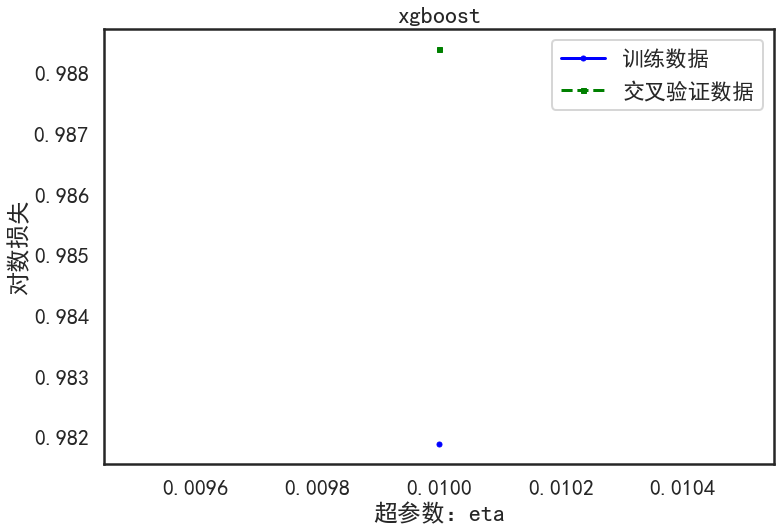

In [5]:
param = {} 
param['objective'] = 'reg:linear'
param['eval_metric'] = 'rmse'
param['booster'] = 'gbtree'
param['silent'] = 1

param['eta'] = 0.01
param['subsample'] = 0.1
param['colsample_bytree'] = 0.5
param['max_depth'] = 2
param['num_parallel_tree'] = 3
param['min_child_weight'] = 5

parameter_dic = {'eta':np.arange(0.01, 0.02, 0.01)}
train_mean, cv_mean, boost_round_mean = cv_result_xgboost(param, parameter_dic, Xtrain, gdtrain, ytrain)
plot_cv_curve(xgb, train_mean, cv_mean, parameter_dic)

模型训练与预测

In [6]:
# 使用交叉验证确定的超参数训练模型，对测试数据进行预测
param = {} 
param['objective'] = 'reg:linear'
param['eval_metric'] = 'rmse'
param['booster'] = 'gbtree'
param['silent'] = 1

param['eta'] = 0.01
param['subsample'] = 0.1
param['colsample_bytree'] = 0.5
param['max_depth'] = 2
param['num_parallel_tree'] = 3
param['min_child_weight'] = 5

num_boost_round = 504
ytest_prob = train_and_predict_xgboost(param, num_boost_round, Xtrain, gdtrain, ytrain, Xtest)

自助法（Bootstrap）估计模型预测准确率置信区间

In [7]:
param = {} 
param['objective'] = 'reg:linear'
param['eval_metric'] = 'rmse'
param['booster'] = 'gbtree'
param['silent'] = 1

param['eta'] = 0.01
param['subsample'] = 0.1
param['colsample_bytree'] = 0.5
param['max_depth'] = 2
param['num_parallel_tree'] = 3
param['min_child_weight'] = 5

num_boost_round = 504

model_folder = os.path.join('data', 'bootstrap_models')
model_prefix='football_data_goal_pts_pos'
n_iterations = 1000

for i in tqdm(range(1, n_iterations + 1)):
    if not os.path.isdir(model_folder):
        os.makedirs(model_folder)
    if not os.path.isfile(os.path.join(model_folder, '{}_{}.pkl'.format(model_prefix, i))):
        Xtrain_r, gdtrain_r, ytrain_r = resample(Xtrain, gdtrain, ytrain)
        best_reg, best_clf = train_xgboost(param, num_boost_round, Xtrain_r, gdtrain_r, ytrain_r)
        pickle.dump((best_reg, best_clf), open(os.path.join(model_folder, '{}_{}.pkl'.format(model_prefix, i)), 'wb'))

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 9237.17it/s]


盈利评估

In [8]:
test_df_sel = test_df.copy()
odds_sources = ['B365', 'IW', 'WH', 'BW', 'PS', 'VC', 'PSC']
test_df_sel['ODDSMAXH'] = np.max(test_df_sel[['{}H'.format(odds) for odds in odds_sources]], axis=1)
test_df_sel['ODDSMAXD'] = np.max(test_df_sel[['{}D'.format(odds) for odds in odds_sources]], axis=1)
test_df_sel['ODDSMAXA'] = np.max(test_df_sel[['{}A'.format(odds) for odds in odds_sources]], axis=1)
odds_max = test_df_sel[['ODDSMAX{}'.format(i) for i in ['H', 'D', 'A']]].values

投注策略1：选择概率估计最大的比赛结果

In [9]:
pred_method = 'max_prob'
model_prefix = 'football_data_goal_pts_pos'

f, p, res_p, res_profit = profit_evaluation(Xtest, ytest, ytest_prob, odds_max, pred_method, model_folder=model_folder, model_prefix=model_prefix)

print('投注策略：选择概率估计的比赛结果，投注所有比赛')
print('预测准确率（95%置信区间）：{:.1f}%（{:.1f}%，{:.1f}%）'.format(p[p>0].shape[0]/p[p!=0].shape[0]*100,
                                                            np.percentile(res_p, 2.5)*100, np.percentile(res_p, 97.5)*100))
print('赔率倒数平均值：           {:.1f}%'.format(np.mean(np.sum(f*1/odds_max, axis=1)[np.sum(f*1/odds_max, axis=1)!=0])*100))
print('投注收益率（95%置信区间）：{:.2f}%（{:.2f}%，{:.2f}%）'.format(np.mean(p[p!=0])*100,np.percentile(res_profit, 2.5)*100,
                                                            np.percentile(res_profit, 97.5)*100))

投注策略：选择概率估计的比赛结果，投注所有比赛
预测准确率（95%置信区间）：51.3%（51.3%，52.1%）
赔率倒数平均值：           51.9%
投注收益率（95%置信区间）：-2.83%（-2.88%，-0.81%）


投注策略1推广：仅投注$p-\frac{1}{b}>\Delta p$的比赛

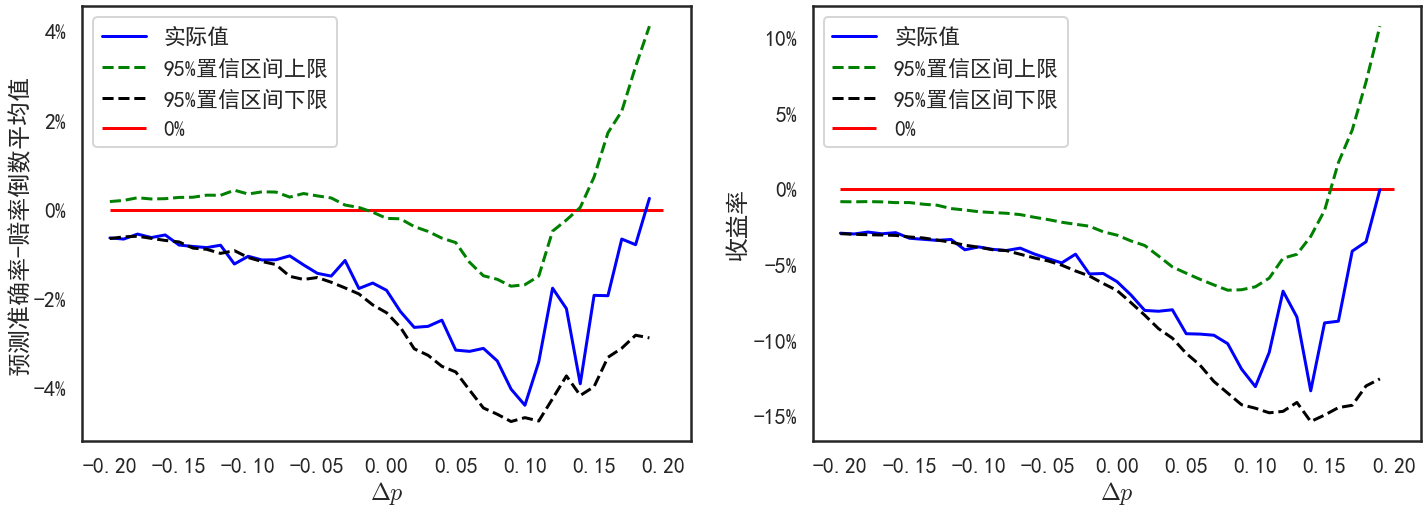

In [10]:
pred_method = 'max_prob'
model_prefix = 'football_data_goal_pts_pos'

plot_vesus_delta_p(Xtest, ytest, ytest_prob, odds_max, pred_method, model_prefix, model_folder=model_folder)
if not os.path.isdir('images'):
    os.makedirs('images')
#plt.savefig('images/common_features_predict_max_prob_profit.png')

投注策略2：选择收益期望估计最大的比赛结果

In [11]:
pred_method = 'max_edge'
model_prefix = 'football_data_goal_pts_pos'

f, p, res_p, res_profit = profit_evaluation(Xtest, ytest, ytest_prob, odds_max, pred_method, model_folder=model_folder, model_prefix=model_prefix)

print('投注策略：选择收益期望估计的比赛结果，投注所有比赛')
print('预测准确率（95%置信区间）：{:.1f}%（{:.1f}%，{:.1f}%）'.format(p[p>0].shape[0]/p[p!=0].shape[0]*100,
                                                            np.percentile(res_p, 2.5)*100, np.percentile(res_p, 97.5)*100))
print('赔率倒数平均值：           {:.1f}%'.format(np.mean(np.sum(f*1/odds_max, axis=1)[np.sum(f*1/odds_max, axis=1)!=0])*100))
print('投注收益率（95%置信区间）：{:.2f}%（{:.2f}%，{:.2f}%）'.format(np.mean(p[p!=0])*100,np.percentile(res_profit, 2.5)*100,
                                                            np.percentile(res_profit, 97.5)*100))

投注策略：选择收益期望估计的比赛结果，投注所有比赛
预测准确率（95%置信区间）：27.4%（26.6%，29.1%）
赔率倒数平均值：           28.2%
投注收益率（95%置信区间）：-0.24%（-3.10%，2.02%）


投注策略2推广：仅投注$p-\frac{1}{b}>\Delta p$的比赛

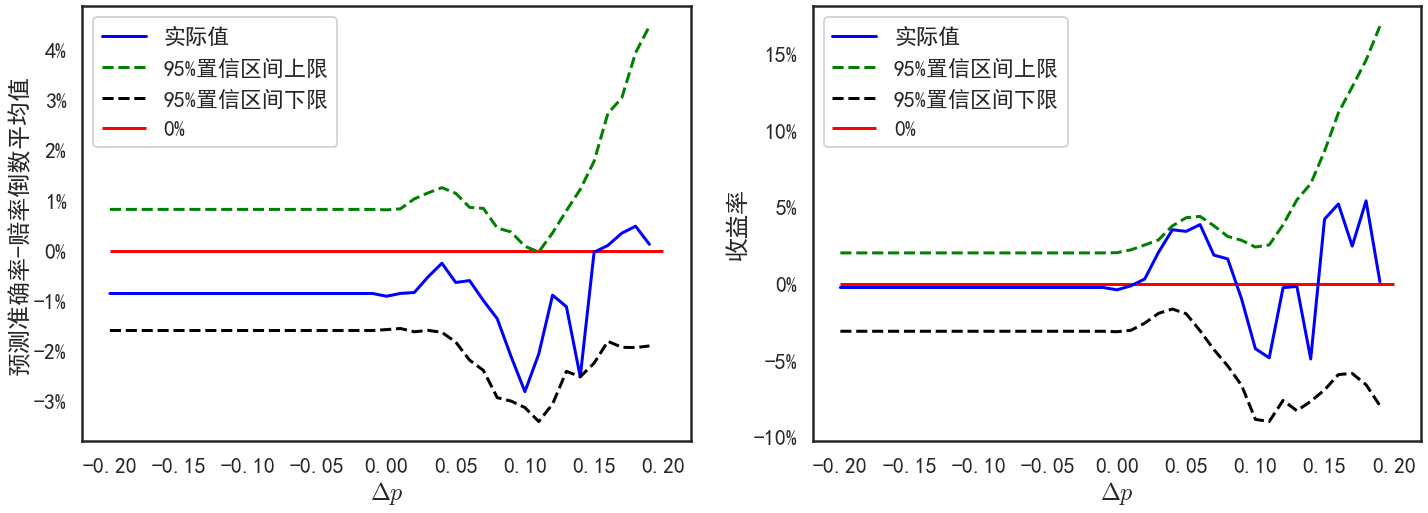

In [12]:
pred_method = 'max_edge'
model_prefix = 'football_data_goal_pts_pos'

plot_vesus_delta_p(Xtest, ytest, ytest_prob, odds_max, pred_method, model_prefix, model_folder=model_folder)
#plt.savefig('images/common_features_predict_max_edge_profit.png')

6.2：使用不常见特征变量（平均犯规数、角球数、黄牌数、红牌数、射门数、射正数）

特征选择

In [13]:
match_prestats_sel = match_prestats[match_prestats.Div.isin(['D1', 'E0', 'SP1', 'F1', 'I1'])].copy()
match_prestats_sel['Date'] = pd.to_datetime(match_prestats_sel['Date'], format='%Y-%m-%d', exact=True)

# 仅使用非八九月份的比赛数据
match_prestats_sel = match_prestats_sel[~match_prestats_sel['Date'].map(lambda x: x.month).isin([8, 9])].copy() 

# 不使用进球数据
event_type_list = ['foulcommit', 'corner', 'yellowcard', 'redcard', 'shot', 'shoton']
feature_list = []

for e in event_type_list:
    feature_list.append('home_team_sf_avg_{}'.format(e))
    feature_list.append('home_team_sf_avg_{}_conceded'.format(e))
    feature_list.append('away_team_sf_avg_{}'.format(e))
    feature_list.append('away_team_sf_avg_{}_conceded'.format(e))
    feature_list.append('home_team_op_avg_{}'.format(e))
    feature_list.append('home_team_op_avg_{}_conceded'.format(e))
    feature_list.append('away_team_op_avg_{}'.format(e))
    feature_list.append('away_team_op_avg_{}_conceded'.format(e))

for f in feature_list + ['result', 'home_team_goal', 'away_team_goal']:
    match_prestats_sel = match_prestats_sel[match_prestats_sel[f].notnull()]

# 训练集/测试集划分
train_df = match_prestats_sel[~match_prestats_sel.season.isin(['2017/2018', '2018/2019'])]
test_df = match_prestats_sel[match_prestats_sel.season.isin(['2017/2018','2018/2019'])]

Xtrain = train_df[feature_list].values
Xtest = test_df[feature_list].values

ytrain = train_df['result'].values.ravel()
ytest = test_df['result'].values.ravel()

hgoaltrain = train_df['home_team_goal'].values
hgoaltest = test_df['home_team_goal'].values

agoaltrain = train_df['away_team_goal'].values
agoaltest = test_df['away_team_goal'].values

gdtrain = hgoaltrain-agoaltrain
gdtest = hgoaltest-agoaltest

print('总数据量：                      {}'.format(match_prestats_sel.shape[0]))
print('训练数据量（包括交叉验证数据）：{}'.format(train_df.shape[0]))
print('测试数据量：                    {}'.format(test_df.shape[0]))

总数据量：                      14292
训练数据量（包括交叉验证数据）：11308
测试数据量：                    2984


交叉验证确定超参数

最优的eta为：0.01
对数损失值（训练数据）：  0.9732
对数损失值(交叉验证数据)：0.9852


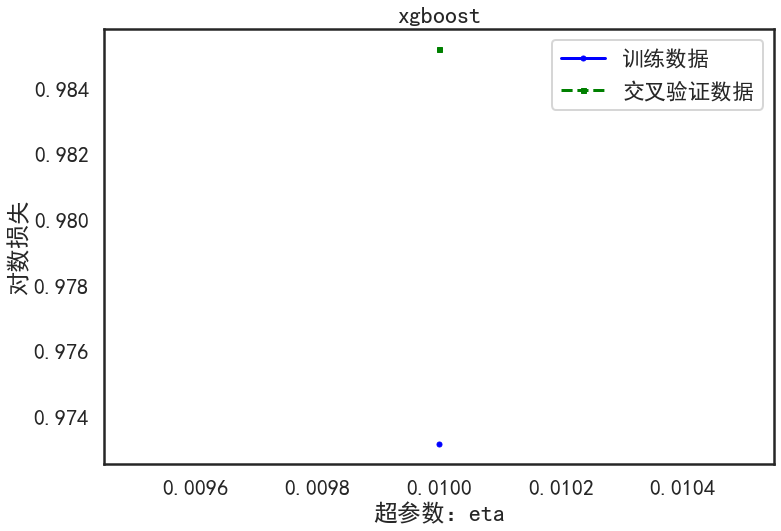

In [14]:
param = {} 
param['objective'] = 'reg:linear'
param['eval_metric'] = 'rmse'
param['booster'] = 'gbtree'
param['silent'] = 1

param['eta'] = 0.01
param['subsample'] = 0.1
param['colsample_bytree'] = 0.8
param['max_depth'] = 2
param['num_parallel_tree'] = 3
param['min_child_weight'] = 10

parameter_dic = {'eta':np.arange(0.01, 0.02, 0.01)}
train_mean, cv_mean, boost_round_mean = cv_result_xgboost(param, parameter_dic, Xtrain, gdtrain, ytrain)
plot_cv_curve(xgb, train_mean, cv_mean, parameter_dic)

模型训练与预测

In [15]:
# 使用交叉验证确定的超参数训练模型，对测试数据进行预测
param = {} 
param['objective'] = 'reg:linear'
param['eval_metric'] = 'rmse'
param['booster'] = 'gbtree'
param['silent'] = 1

param['eta'] = 0.01
param['subsample'] = 0.1
param['colsample_bytree'] = 0.8
param['max_depth'] = 2
param['num_parallel_tree'] = 3
param['min_child_weight'] = 10

num_boost_round = 685
ytest_prob = train_and_predict_xgboost(param, num_boost_round, Xtrain, gdtrain, ytrain, Xtest)

估计模型预测准确率置信区间

In [16]:
param = {} 
param['objective'] = 'reg:linear'
param['eval_metric'] = 'rmse'
param['booster'] = 'gbtree'
param['silent'] = 1

param['eta'] = 0.01
param['subsample'] = 0.1
param['colsample_bytree'] = 0.8
param['max_depth'] = 2
param['num_parallel_tree'] = 3
param['min_child_weight'] = 10

num_boost_round = 685

model_folder = os.path.join('data', 'bootstrap_models')
model_prefix='football_data_foul_corner_yc_rc_shot_shoton'
n_iterations = 1000

for i in tqdm(range(1, n_iterations + 1)):
    if not os.path.isdir(model_folder):
        os.makedirs(model_folder)
    if not os.path.isfile(os.path.join(model_folder, '{}_{}.pkl'.format(model_prefix, i))):
        Xtrain_r, gdtrain_r, ytrain_r = resample(Xtrain, gdtrain, ytrain)
        best_reg, best_clf = train_xgboost(param, num_boost_round, Xtrain_r, gdtrain_r, ytrain_r)
        pickle.dump((best_reg, best_clf), open(os.path.join(model_folder, '{}_{}.pkl'.format(model_prefix, i)), 'wb'))

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8004.93it/s]


盈利评估

In [17]:
test_df_sel = test_df.copy()
odds_sources = ['B365', 'IW', 'WH', 'BW', 'PS', 'VC', 'PSC']
test_df_sel['ODDSMAXH'] = np.max(test_df_sel[['{}H'.format(odds) for odds in odds_sources]], axis=1)
test_df_sel['ODDSMAXD'] = np.max(test_df_sel[['{}D'.format(odds) for odds in odds_sources]], axis=1)
test_df_sel['ODDSMAXA'] = np.max(test_df_sel[['{}A'.format(odds) for odds in odds_sources]], axis=1)
odds_max = test_df_sel[['ODDSMAX{}'.format(i) for i in ['H', 'D', 'A']]].values

投注策略1：选择概率估计最大的比赛结果

In [18]:
pred_method = 'max_prob'
model_prefix = 'football_data_foul_corner_yc_rc_shot_shoton'

f, p, res_p, res_profit = profit_evaluation(Xtest, ytest, ytest_prob, odds_max, pred_method, model_folder=model_folder, model_prefix=model_prefix)

print('投注策略：选择概率估计的比赛结果，投注所有比赛')
print('预测准确率（95%置信区间）：{:.1f}%（{:.1f}%，{:.1f}%）'.format(p[p>0].shape[0]/p[p!=0].shape[0]*100,
                                                            np.percentile(res_p, 2.5)*100, np.percentile(res_p, 97.5)*100))
print('赔率倒数平均值：           {:.1f}%'.format(np.mean(np.sum(f*1/odds_max, axis=1)[np.sum(f*1/odds_max, axis=1)!=0])*100))
print('投注收益率（95%置信区间）：{:.2f}%（{:.2f}%，{:.2f}%）'.format(np.mean(p[p!=0])*100,np.percentile(res_profit, 2.5)*100,
                                                            np.percentile(res_profit, 97.5)*100))

投注策略：选择概率估计的比赛结果，投注所有比赛
预测准确率（95%置信区间）：51.8%（51.5%，52.4%）
赔率倒数平均值：           51.6%
投注收益率（95%置信区间）：0.15%（-0.90%，1.75%）


投注策略1推广：仅投注$p-\frac{1}{b}>\Delta p$的比赛

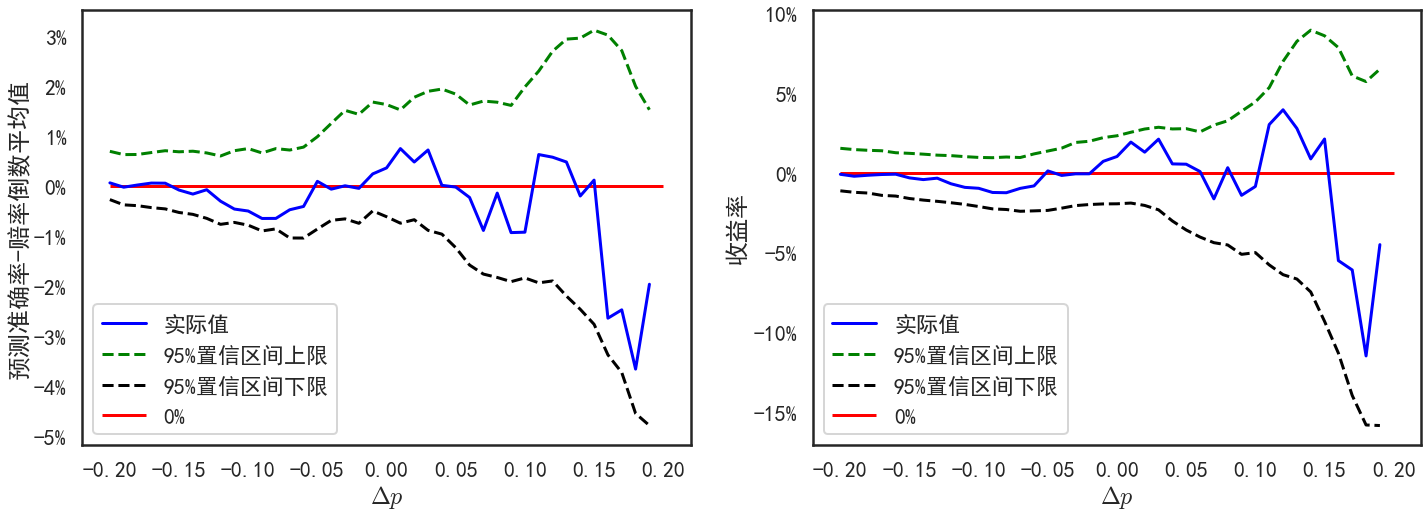

In [19]:
pred_method = 'max_prob'
model_prefix = 'football_data_foul_corner_yc_rc_shot_shoton'

plot_vesus_delta_p(Xtest, ytest, ytest_prob, odds_max, pred_method, model_prefix, model_folder=model_folder)
#plt.savefig('images/uncommon_features_predict_max_prob_profit.png')

投注策略2：选择收益期望估计最大的比赛结果

In [20]:
pred_method = 'max_edge'
model_prefix = 'football_data_foul_corner_yc_rc_shot_shoton'

f, p, res_p, res_profit = profit_evaluation(Xtest, ytest, ytest_prob, odds_max, pred_method, model_folder=model_folder, model_prefix=model_prefix)

print('投注策略：选择收益期望估计的比赛结果，投注所有比赛')
print('预测准确率（95%置信区间）：{:.1f}%（{:.1f}%，{:.1f}%）'.format(p[p>0].shape[0]/p[p!=0].shape[0]*100,
                                                            np.percentile(res_p, 2.5)*100, np.percentile(res_p, 97.5)*100))
print('赔率倒数平均值：           {:.1f}%'.format(np.mean(np.sum(f*1/odds_max, axis=1)[np.sum(f*1/odds_max, axis=1)!=0])*100))
print('投注收益率（95%置信区间）：{:.2f}%（{:.2f}%，{:.2f}%）'.format(np.mean(p[p!=0])*100,np.percentile(res_profit, 2.5)*100,
                                                            np.percentile(res_profit, 97.5)*100))

投注策略：选择收益期望估计的比赛结果，投注所有比赛
预测准确率（95%置信区间）：28.1%（27.2%，29.6%）
赔率倒数平均值：           28.0%
投注收益率（95%置信区间）：-0.39%（-4.50%，0.94%）


投注策略2推广：仅投注$p-\frac{1}{b}>\Delta p$的比赛

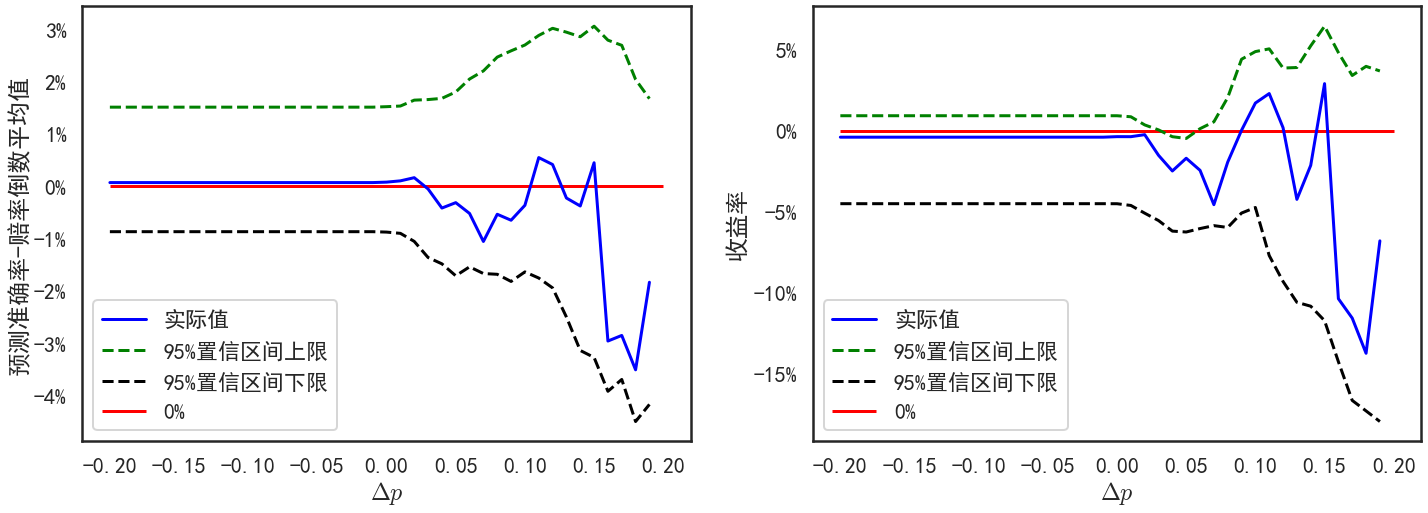

In [21]:
pred_method = 'max_edge'
model_prefix = 'football_data_foul_corner_yc_rc_shot_shoton'

plot_vesus_delta_p(Xtest, ytest, ytest_prob, odds_max, pred_method, model_prefix, model_folder=model_folder)
#plt.savefig('images/uncommon_features_predict_max_edge_profit.png')

6.3：同时使用常见和不常见特征变量

特征选择

In [22]:
match_prestats_sel = match_prestats[match_prestats.Div.isin(['D1', 'E0', 'SP1', 'F1', 'I1'])].copy()
match_prestats_sel['Date'] = pd.to_datetime(match_prestats_sel['Date'], format='%Y-%m-%d', exact=True)

# 仅使用非八九月份的比赛数据
match_prestats_sel = match_prestats_sel[~match_prestats_sel['Date'].map(lambda x: x.month).isin([8, 9])].copy() 

# 不使用进球数据
event_type_list = ['goal', 'foulcommit', 'corner', 'yellowcard', 'redcard', 'shot', 'shoton']
feature_list = []

for e in event_type_list:
    feature_list.append('home_team_sf_avg_{}'.format(e))
    feature_list.append('home_team_sf_avg_{}_conceded'.format(e))
    feature_list.append('away_team_sf_avg_{}'.format(e))
    feature_list.append('away_team_sf_avg_{}_conceded'.format(e))
    feature_list.append('home_team_op_avg_{}'.format(e))
    feature_list.append('home_team_op_avg_{}_conceded'.format(e))
    feature_list.append('away_team_op_avg_{}'.format(e))
    feature_list.append('away_team_op_avg_{}_conceded'.format(e))
    
feature_list.append('home_team_pts_per_match')
feature_list.append('away_team_pts_per_match')
feature_list.append('home_team_pts_pos')
feature_list.append('away_team_pts_pos')

for f in feature_list + ['result', 'home_team_goal', 'away_team_goal']:
    match_prestats_sel = match_prestats_sel[match_prestats_sel[f].notnull()]

# 训练集/测试集划分
train_df = match_prestats_sel[~match_prestats_sel.season.isin(['2017/2018', '2018/2019'])]
test_df = match_prestats_sel[match_prestats_sel.season.isin(['2017/2018','2018/2019'])]

Xtrain = train_df[feature_list].values
Xtest = test_df[feature_list].values

ytrain = train_df['result'].values.ravel()
ytest = test_df['result'].values.ravel()

hgoaltrain = train_df['home_team_goal'].values
hgoaltest = test_df['home_team_goal'].values

agoaltrain = train_df['away_team_goal'].values
agoaltest = test_df['away_team_goal'].values

gdtrain = hgoaltrain-agoaltrain
gdtest = hgoaltest-agoaltest

print('总数据量：                      {}'.format(match_prestats_sel.shape[0]))
print('训练数据量（包括交叉验证数据）：{}'.format(train_df.shape[0]))
print('测试数据量：                    {}'.format(test_df.shape[0]))

总数据量：                      14292
训练数据量（包括交叉验证数据）：11308
测试数据量：                    2984


交叉验证确定超参数

最优的eta为：0.001
对数损失值（训练数据）：  0.9697
对数损失值(交叉验证数据)：0.9785


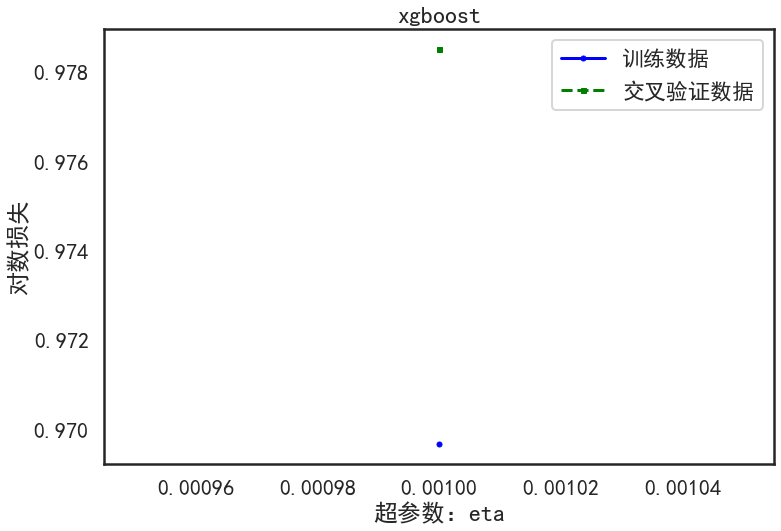

In [23]:
#XGBoost
param = {} 
param['objective'] = 'reg:linear'
param['eval_metric'] = 'rmse'
param['booster'] = 'gbtree'
param['silent'] = 1

param['eta'] = 0.001
param['subsample'] = 0.1
param['colsample_bytree'] = 0.1
param['max_depth'] = 2
param['num_parallel_tree'] = 1
param['min_child_weight'] = 20

parameter_dic = {'eta':np.arange(0.001, 0.002, 0.001)}
train_mean, cv_mean, boost_round_mean = cv_result_xgboost(param, parameter_dic, Xtrain, gdtrain, ytrain)
plot_cv_curve(xgb, train_mean, cv_mean, parameter_dic)

模型训练与预测

In [24]:
# 使用交叉验证确定的超参数训练模型，对测试数据进行预测
param = {} 
param['objective'] = 'reg:linear'
param['eval_metric'] = 'rmse'
param['booster'] = 'gbtree'
param['silent'] = 1

param['eta'] = 0.001
param['subsample'] = 0.1
param['colsample_bytree'] = 0.1
param['max_depth'] = 2
param['num_parallel_tree'] = 1
param['min_child_weight'] = 20

num_boost_round = 5779
ytest_prob = train_and_predict_xgboost(param, num_boost_round, Xtrain, gdtrain, ytrain, Xtest)

估计模型预测准确率置信区间

In [25]:
param = {} 
param['objective'] = 'reg:linear'
param['eval_metric'] = 'rmse'
param['booster'] = 'gbtree'
param['silent'] = 1

param['eta'] = 0.001
param['subsample'] = 0.1
param['colsample_bytree'] = 0.1
param['max_depth'] = 2
param['num_parallel_tree'] = 1
param['min_child_weight'] = 20

num_boost_round = 5779

model_folder = os.path.join('data', 'bootstrap_models')
model_prefix='football_data_all_stats'
n_iterations = 1000

for i in tqdm(range(1, n_iterations + 1)):
    if not os.path.isdir(model_folder):
        os.makedirs(model_folder)
    if not os.path.isfile(os.path.join(model_folder, '{}_{}.pkl'.format(model_prefix, i))):
        Xtrain_r, gdtrain_r, ytrain_r = resample(Xtrain, gdtrain, ytrain)
        best_reg, best_clf = train_xgboost(param, num_boost_round, Xtrain_r, gdtrain_r, ytrain_r)
        pickle.dump((best_reg, best_clf), open(os.path.join(model_folder, '{}_{}.pkl'.format(model_prefix, i)), 'wb'))

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8616.16it/s]


盈利评估

In [26]:
test_df_sel = test_df.copy()
odds_sources = ['B365', 'IW', 'WH', 'BW', 'PS', 'VC', 'PSC']
test_df_sel['ODDSMAXH'] = np.max(test_df_sel[['{}H'.format(odds) for odds in odds_sources]], axis=1)
test_df_sel['ODDSMAXD'] = np.max(test_df_sel[['{}D'.format(odds) for odds in odds_sources]], axis=1)
test_df_sel['ODDSMAXA'] = np.max(test_df_sel[['{}A'.format(odds) for odds in odds_sources]], axis=1)
odds_max = test_df_sel[['ODDSMAX{}'.format(i) for i in ['H', 'D', 'A']]].values

投注策略1：选择概率估计最大的比赛结果

In [27]:
pred_method = 'max_prob'
model_prefix='football_data_all_stats'

f, p, res_p, res_profit = profit_evaluation(Xtest, ytest, ytest_prob, odds_max, pred_method, model_folder=model_folder, model_prefix=model_prefix)

print('投注策略：选择概率估计的比赛结果，投注所有比赛')
print('预测准确率（95%置信区间）：{:.1f}%（{:.1f}%，{:.1f}%）'.format(p[p>0].shape[0]/p[p!=0].shape[0]*100,
                                                            np.percentile(res_p, 2.5)*100, np.percentile(res_p, 97.5)*100))
print('赔率倒数平均值：           {:.1f}%'.format(np.mean(np.sum(f*1/odds_max, axis=1)[np.sum(f*1/odds_max, axis=1)!=0])*100))
print('投注收益率（95%置信区间）：{:.2f}%（{:.2f}%，{:.2f}%）'.format(np.mean(p[p!=0])*100,np.percentile(res_profit, 2.5)*100,
                                                            np.percentile(res_profit, 97.5)*100))

投注策略：选择概率估计的比赛结果，投注所有比赛
预测准确率（95%置信区间）：52.4%（52.1%，52.7%）
赔率倒数平均值：           52.5%
投注收益率（95%置信区间）：-1.29%（-2.04%，-0.25%）


投注策略1推广：仅投注$p-\frac{1}{b}>\Delta p$的比赛

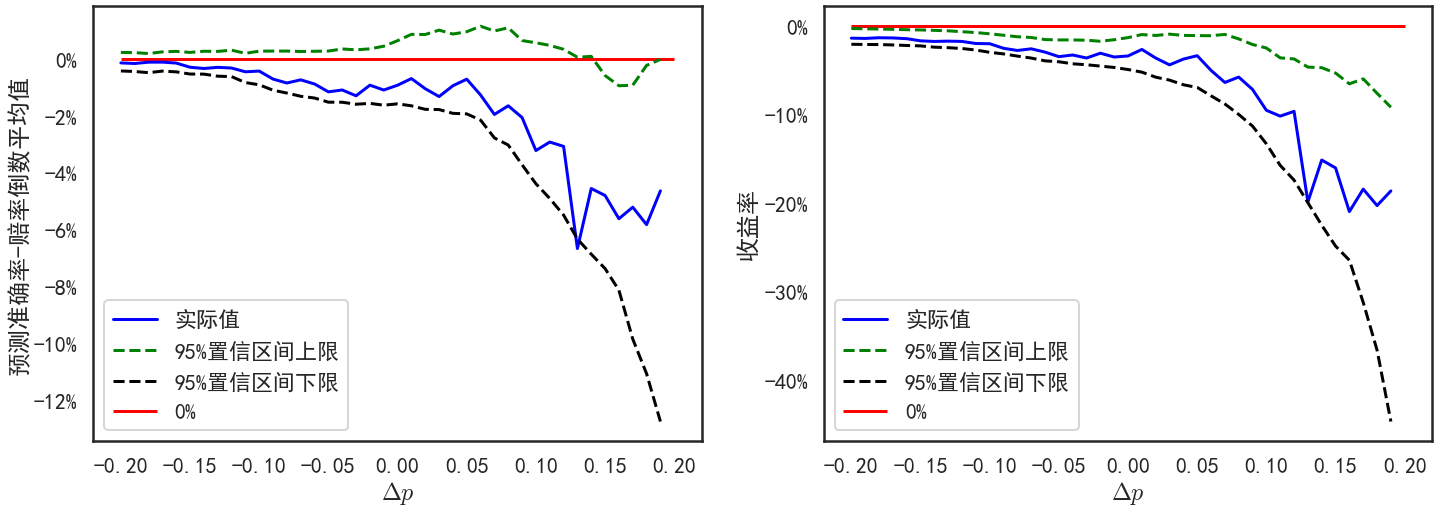

In [28]:
pred_method = 'max_prob'
model_prefix='football_data_all_stats'

plot_vesus_delta_p(Xtest, ytest, ytest_prob, odds_max, pred_method, model_prefix, model_folder=model_folder)
#plt.savefig('images/all_features_predict_max_prob_profit.png')

投注策略2：选择收益期望估计最大的比赛结果

In [29]:
pred_method = 'max_edge'
model_prefix='football_data_all_stats'

f, p, res_p, res_profit = profit_evaluation(Xtest, ytest, ytest_prob, odds_max, pred_method, model_folder=model_folder, model_prefix=model_prefix)

print('投注策略：选择收益期望估计的比赛结果，投注所有比赛')
print('预测准确率（95%置信区间）：{:.1f}%（{:.1f}%，{:.1f}%）'.format(p[p>0].shape[0]/p[p!=0].shape[0]*100,
                                                            np.percentile(res_p, 2.5)*100, np.percentile(res_p, 97.5)*100))
print('赔率倒数平均值：           {:.1f}%'.format(np.mean(np.sum(f*1/odds_max, axis=1)[np.sum(f*1/odds_max, axis=1)!=0])*100))
print('投注收益率（95%置信区间）：{:.2f}%（{:.2f}%，{:.2f}%）'.format(np.mean(p[p!=0])*100,np.percentile(res_profit, 2.5)*100,
                                                            np.percentile(res_profit, 97.5)*100))

投注策略：选择收益期望估计的比赛结果，投注所有比赛
预测准确率（95%置信区间）：28.2%（27.2%，30.0%）
赔率倒数平均值：           28.7%
投注收益率（95%置信区间）：-2.14%（-6.04%，-0.64%）


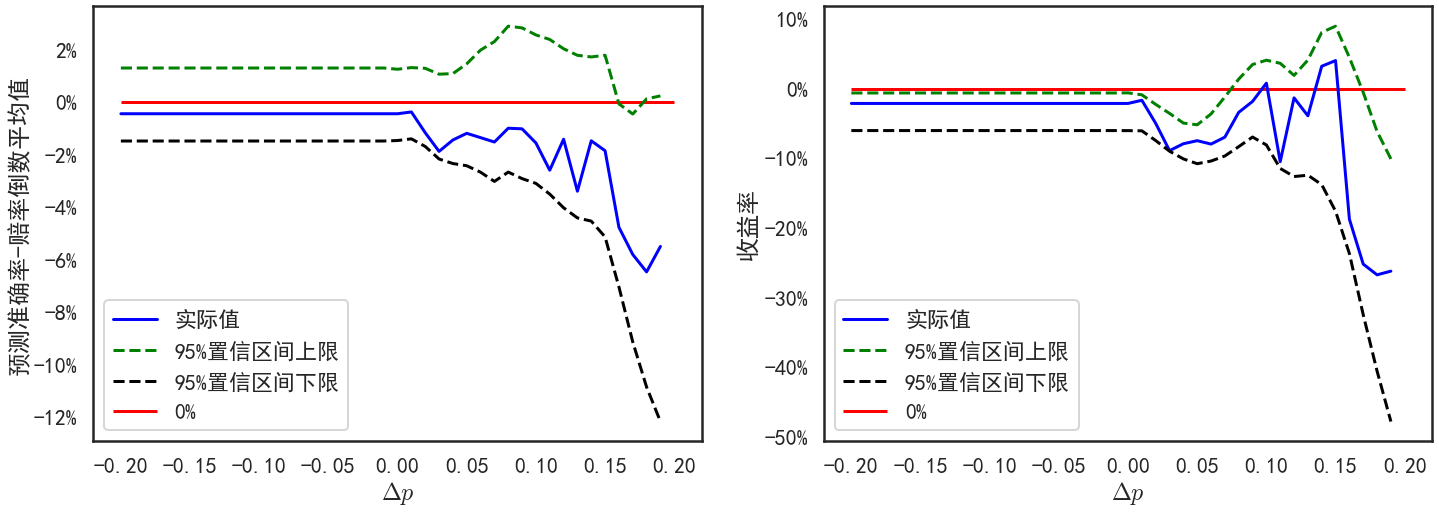

In [30]:
pred_method = 'max_edge'
model_prefix='football_data_all_stats'

plot_vesus_delta_p(Xtest, ytest, ytest_prob, odds_max, pred_method, model_prefix, model_folder=model_folder)
#plt.savefig('images/all_features_predict_max_edge_profit.png')